In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.spatial import distance
from sklearn.datasets.samples_generator import make_blobs

## Clustering
---
Clustering represents one of the most basic and commonly employed methods of unsupervised learning. In a clustering problem, one attempts to find some underlying geometrical structure within a dataset in the hopes of using this structure to aide a specific task.

Some applications of clustering might include...

__Unsupervised Classification__ 

Given a set of un-labeled data, is it possible to automatically determine class assignment?


__Dimensionality Reduction__ 

Given a set of dataset, what is the best way to represent the dataset with the fewest bits but with the highest precision?

### K-Means
---
We will start our discussion of clustering with one of the most famous and simplest clustering algorithms, K-Means clustering. K-Means clustering a _centroid_ based clustering scheme. The term $K$ comes from the a priori assumption of the existence of $K$ clusters within the dataset.

 > ___Assumption Alert:___ _One knows or knows how to choose the number of clusters, $K$._
 
Each of the $K$ clusters are denoted by a centroid...a point in the data space which is approximatetly equidistant between all the points in the cluster. So, to apply K-Means, already, we need to be able to apply the concept of _distance_. 

 > ___Assumption Alert:___ _One knows a metric that can be applied to calculate a distance between any two data points._
 
For example, the distance metric might be the squared Euclidean distance,
$$ d(\mathbf{a},\mathbf{b}) = ||\mathbf{a} - \mathbf{b}||_2^2 = \sum_{i=1}^N (a_i - b_i)^2.$$


In [4]:
def distance(a, b):
    """ Calculate a distance between two N-dimensional points.
    """    
    ###----- TODO-TASK -----###
    ### Implement a distance metric
#     d = np.nan <--- replace this line
    d = np.sum((a-b)**2,axis=1)
#     M = np.array([[1,0],[0,0.5]])
#     z = (a-b).ravel()
#     d = np.sum(z.dot(M.dot(z)))
    ###---------------------###
    return d

Given the metric we've defined above, we can visualize this metric by looking at the distances from the origin. For the Euclidean distance metric, we should see the contours of equal distance appearing as circles. This demonstrates the isometry of the metric. 

__Side Exercise:__ _Devise and implement a non-isometric distance metric._

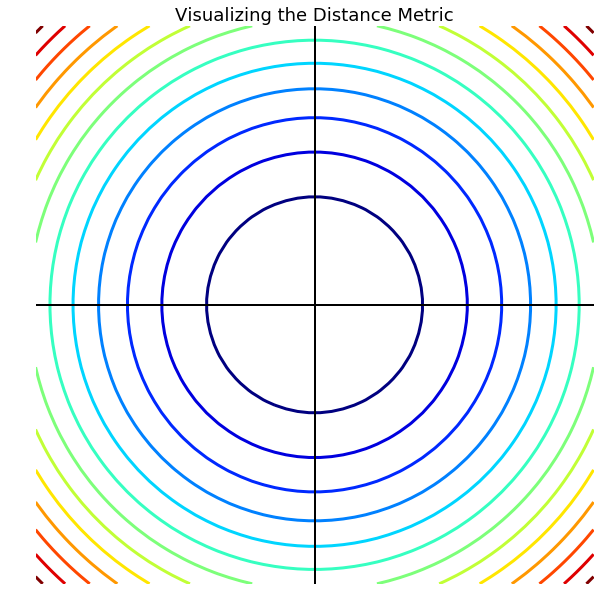

In [5]:
### Visualize the distance metric defined above ### 
import matplotlib.pyplot as plt

# Parameters
center = np.zeros((1,2))  # Center
npts = 50

# Define the domain to calculate distances over
domain = np.linspace(-1,1,npts)
A, B = np.meshgrid(domain, domain)
A = np.reshape(A,(npts*npts,1))
B = np.reshape(B,(npts*npts,1))
X = np.concatenate((A,B),axis=1)


# Calculate all distances
D = np.zeros((npts*npts,1))
for i in range(0,npts*npts):
    D[i] = distance(center,X[i,:])

D = np.reshape(D,(npts,npts))    

# Plot Figure
plt.figure(figsize=(10,10))
plt.contour(np.reshape(A,(npts,npts)),np.reshape(B,(npts,npts)), D,
            15, linewidths=3)
plt.plot([0, 0],[-1, 1],'-k',linewidth=2) # Vert 'axis'
plt.plot([-1, 1],[0, 0],'-k',linewidth=2) # Horz 'axis'
plt.axis('off')
plt.box('on')
plt.title('Visualizing the Distance Metric', fontsize = 18);

For our purposes in this assignment we will stick to this metric, but there many, many more choices which are dependent upon the dataset in question (e.g. Hamming distances, Minkowski distances, etc.)

 > ___Assumption Alert:___ _When using a Euclidean distance metric, one assumes isometry along all directions, i.e. all clusters can be modeled as spheres._
 
Given a value of $K$, a dataset $\mathbf{X}$, and some distance metric $d$, how does one then go about finding these centroids and the clusters they represent? We will see that we are caught in a chicken-and-egg problem. To find the centroids we need to find the equidistant point in each cluster, but to do this we need to know cluters, _which requires knowledge of the cetroids_. How can we approach this problem?

Let us assume that we are given a set of starting centroids. These could be random points, selected points from the dataset, or could be calculated any number of intelligent centroid initialization schemes.

 > ___Assumption Alert:___ _One knows an adequate method of selecting initial centroids._
 
Then, we can imagine a heuristic algorithm which iteratively updates the cluster assignment, then the centroids, then the cluster assignment, then the centroids, then...

1. __Assign:__ Assign each data point to the cluster represented by the nearest centroid.
2. __Update:__ Given the previous assignment, update the centroids represented by each cluster.

Now, lets implement this iteration and observe how it works, step-by-step.

In [219]:
def basic_kmeans(X, k, init_centroids = None, max_steps = 10):
    """Perform K-means clustering.
    
    Given dataset `X` with features along rows and samples
    along columns, perform K-means clustering on the dataset
    using the Euclidean distance metric.
    
    Keyword arguments:
    init_centroids -- initial value for the k centroids. If `None` is
                      given, then a random set of `k` data points from
                      `X` are used for the intial centroids. [default: None]
    max_steps      -- number of K-means update steps to perform. [default: 10]
    """
    
    (n, p) = X.shape
    
    # Initialize Outputs
    centroids   = np.zeros((n,k))
    assignments = np.zeros(n)
    
    # Set initial centroids
    if (init_centroids == None):
        # Select k random data points from the dataset
        idx = np.random.permutation(p-1)[0:k]
        centroids = np.copy(X[:,idx])
    else:
        # Use the initial centroids
        centroids = np.copy(init_centroids)

    ###----- TODO-TASK -----###
    ### Implement the k-Means iteration
    for step in range(0,max_steps):
        pass # Replace 
        # 1. Assignment
        D = distance.cdist(centroids.transpose(), X.transpose())
        assignment = np.argmin(D, axis = 0)
        # 2. Update Centroids
        for i in range(0,k):
            centroid[:,i] = np.mean(X[:,assignment == i], axis = 1)
    ###---------------------###
    
    # Return final output
    return (centroids, assignments)

In [239]:
ktrue = 4
(X,true_assignments) = make_blobs(n_samples = 1000, n_features = 2, centers = ktrue)
X = X.transpose()

plt.figure(figsize=(10,10))
for i in range(0,ktrue):
    plt.scatter(X[1,true_assignments==i],X[2,true_assignments==i])

IndexError: index 2 is out of bounds for axis 0 with size 2

### DBSCAN
---

In [211]:
X = np.random.randn(2,500)
c = np.random.randn(2,10)

In [220]:
D = distance.cdist(c.transpose(),X.transpose())
assignment = np.argmin(D, axis = 0)

In [222]:
for i in range(0,10):
    c[:,i] = np.mean(X[:,assignment == i], axis = 1)

(2, 10)

In [232]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.
    
    cluster_std: float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    
    center_box: pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers are